In [353]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [354]:
df=pd.read_csv('diamonds.csv')

In [355]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [356]:
df.shape

(53940, 11)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning and EDA

In [358]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [359]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [360]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [361]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

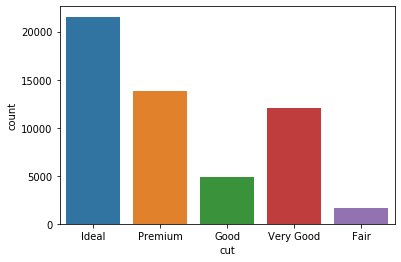

In [362]:
sns.countplot('cut',data=df)

In [363]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

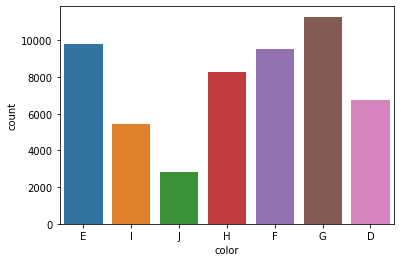

In [364]:
sns.countplot('color',data=df)

In [365]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

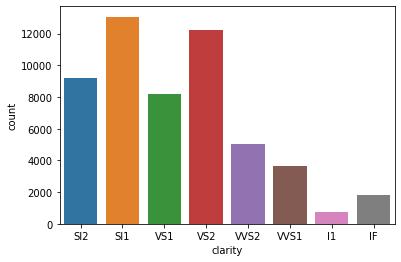

In [366]:
sns.countplot('clarity',data=df)

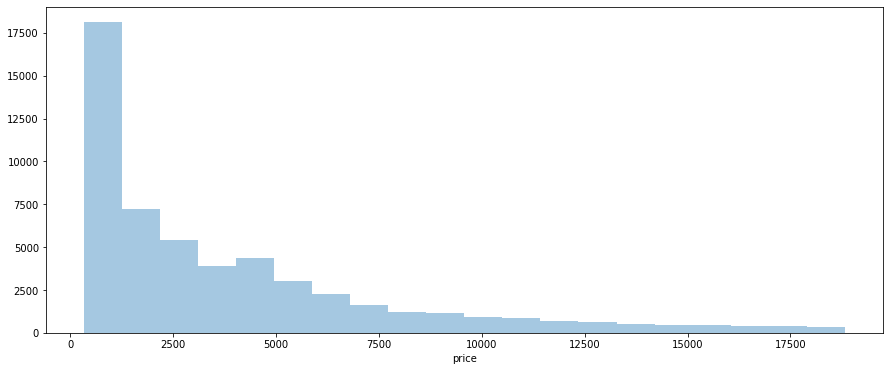

In [367]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'],kde=False,bins=20)

### Checking for correlation

In [368]:
correlation=df.corr()

In [369]:
print(correlation['price'].sort_values(ascending=False))

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [370]:
df.drop(['table','depth'],axis=1,inplace=True)

In [371]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


### Encoding the categorical variable and checking there correlation

In [372]:
def change_cut(a):
    if(a=='Fair'):
        return 0
    elif(a=='Good'):
        return 1
    elif(a=='Very Good'):
        return 2
    elif(a=='Premium'):
        return 3
    else:
        return 4

In [373]:
df['new_cut']=df['cut'].apply(change_cut)

In [374]:
def change_color(a):
    if(a=='J'):
        return 0
    elif(a=='I'):
        return 1
    elif(a=='H'):
        return 2
    elif(a=='G'):
        return 3
    elif(a=='F'):
        return 4
    elif(a=='E'):
        return 5
    else:
        return 6

In [375]:
df['new_color']=df['color'].apply(change_color)

In [376]:
df.head()

,carat,cut,color,clarity,price,x,y,z,new_cut,new_color
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,4,5
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,3,5
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,1,5
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,1,0


In [377]:
correlation=df.corr()

In [378]:
print(correlation['price'].sort_values(ascending=False))

price        1.000000
carat        0.921591
x            0.884435
y            0.865421
z            0.861249
new_cut     -0.053491
new_color   -0.172511
Name: price, dtype: float64


In [379]:
from sklearn.preprocessing import LabelEncoder

In [380]:
le=LabelEncoder()

In [381]:
df['new_clarity']=le.fit_transform(df['clarity'])

In [382]:
df.head()

,carat,cut,color,clarity,price,x,y,z,new_cut,new_color,new_clarity
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,4,5,3
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,3,5,2
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,1,5,4
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,3,1,5
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,1,0,3


In [383]:
correlation=df.corr()

In [384]:
print(correlation['price'].sort_values(ascending=False))

price          1.000000
carat          0.921591
x              0.884435
y              0.865421
z              0.861249
new_cut       -0.053491
new_clarity   -0.071535
new_color     -0.172511
Name: price, dtype: float64


### There is no correlation between categorical variables

In [385]:
df1=df.drop(['color','new_color','cut','new_cut','clarity','new_clarity'],axis=1)

In [386]:
df1.head()

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75


### Checking for outliers

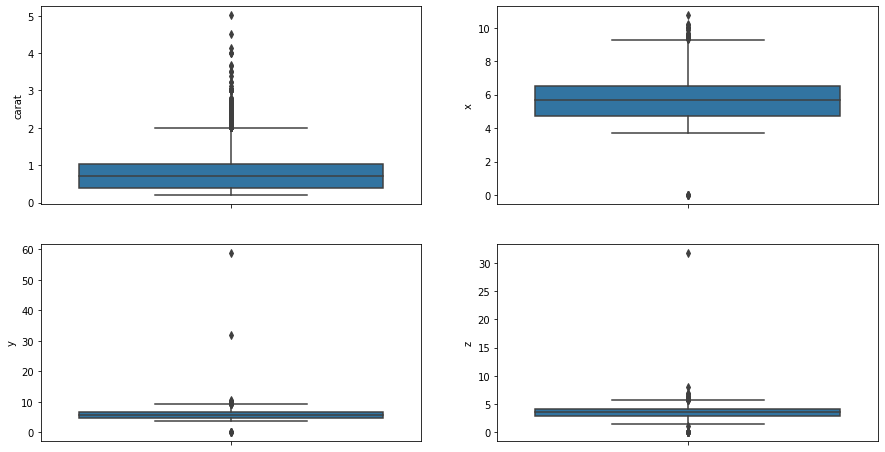

In [387]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
sns.boxplot(y='carat',data=df,ax=ax[0][0])
sns.boxplot(y='x',data=df1,ax=ax[0][1])
sns.boxplot(y='y',data=df1,ax=ax[1][0])
sns.boxplot(y='z',data=df1,ax=ax[1][1])

### Removing the outliers

In [388]:
fqt,tqt=np.percentile(df1['x'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(fqt,tqt)

4.71 6.54


In [389]:
df1.drop(df1[df1['x']<1].index,inplace=True)

In [390]:
fqt,tqt=np.percentile(df1['y'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(3*iqr)
print(fqt,tqt)

4.72 6.54


In [391]:
df1.drop(df1[df1['y']>ub].index,inplace=True)

In [392]:
fqt,tqt=np.percentile(df1['z'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(3*iqr)
print(lb,ub)

1.2150000000000003 7.43


In [393]:
df1.drop(df1[df1['z']>ub].index,inplace=True)

In [394]:
df1.drop(df1[df1['z']<lb].index,inplace=True)

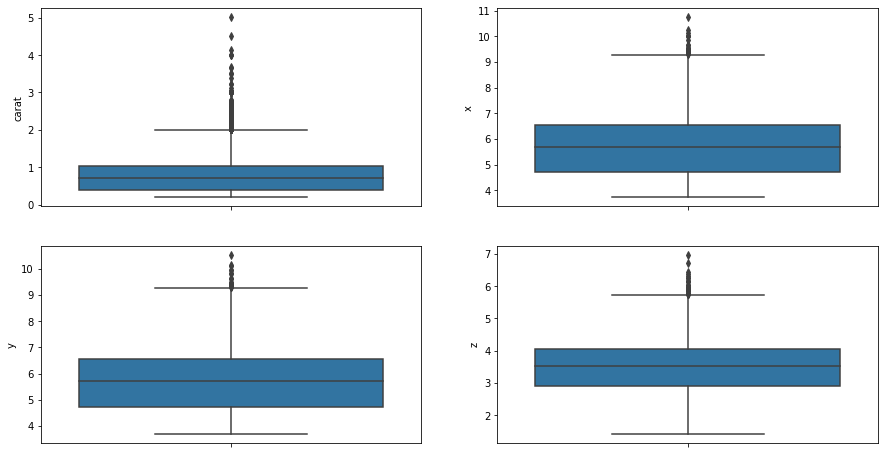

In [395]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
sns.boxplot(y='carat',data=df,ax=ax[0][0])
sns.boxplot(y='x',data=df1,ax=ax[0][1])
sns.boxplot(y='y',data=df1,ax=ax[1][0])
sns.boxplot(y='z',data=df1,ax=ax[1][1])

In [396]:
df1.head(10)

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75
5,0.24,336,3.94,3.96,2.48
6,0.24,336,3.95,3.98,2.47
7,0.26,337,4.07,4.11,2.53
8,0.22,337,3.87,3.78,2.49
9,0.23,338,4.00,4.05,2.39


In [397]:
df1.shape

(53916, 5)

### Feature Scaling 

In [398]:
from sklearn.preprocessing import StandardScaler

In [401]:
x=df1.drop('price',axis=1)
x

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75
...,...,...,...,...
53935,0.72,5.75,5.76,3.50
53936,0.72,5.69,5.75,3.61
53937,0.70,5.66,5.68,3.56
53938,0.86,6.15,6.12,3.74


In [402]:
scaler=StandardScaler()

In [406]:
X=scaler.fit_transform(x)
X

array([[-1.198208  , -1.59156334, -1.57785209, -1.60432892],
       [-1.24042209, -1.6451637 , -1.7038347 , -1.7778551 ],
       [-1.198208  , -1.50222941, -1.49686327, -1.7778551 ],
       ...,
       [-0.20617694, -0.06395306, -0.04806331,  0.02970928],
       [ 0.13153576,  0.37378322,  0.34788203,  0.28999855],
       [-0.10064172,  0.08791463,  0.12291309,  0.1453934 ]])

In [410]:
y=df1['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53916, dtype: int64

In [428]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [425]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [414]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [416]:
print(cross_val_score(LinearRegression(),X,y,scoring='r2',cv=cv))

[0.85739839 0.85806868 0.85445675 0.86128267 0.85516583 0.85140338
 0.86246215 0.8599418  0.85819599 0.85824899]


In [417]:
print(cross_val_score(LinearRegression(),X,y,scoring='r2',cv=cv).mean())

0.8576624616821468


In [419]:
print(cross_val_score(RandomForestRegressor(),X,y,scoring='r2',cv=cv))

[0.86818185 0.86865752 0.86671104 0.87090146 0.86920543 0.86557844
 0.8696137  0.8692892  0.86765897 0.86797564]


In [420]:
print(cross_val_score(RandomForestRegressor(),X,y,scoring='r2',cv=cv).mean())

0.8683192345053318


In [423]:
print(cross_val_score(AdaBoostRegressor(),X,y,scoring='r2',cv=cv))

[0.86208792 0.83798147 0.84519419 0.86794127 0.83451008 0.84233953
 0.847709   0.86566465 0.83548745 0.86049109]


In [424]:
print(cross_val_score(AdaBoostRegressor(),X,y,scoring='r2',cv=cv).mean())

0.849159535963359


In [426]:
print(cross_val_score(GradientBoostingRegressor(),X,y,scoring='r2',cv=cv))

[0.88085334 0.88252061 0.88029701 0.88517279 0.88191091 0.87868412
 0.88278477 0.88339913 0.88151615 0.88150812]


In [427]:
print(cross_val_score(GradientBoostingRegressor(),X,y,scoring='r2',cv=cv).mean())

0.8818652407103263


### Hyperparameter Tunning 